# Install Dependencies

In [ ]:
!pip install deepxde

# Import Libraries and Backend

In [ ]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import os

# Set recommended backend explicitly to avoid the automatic backend selection
# Why Paddle? DeepXDE recommends it now for better performance and fewer TensorFlow-related warnings.

os.environ["DDE_BACKEND"] = "paddle"

import deepxde as dde
import numpy as np

# Define functions

In [ ]:
def func_0(x):
    return x * np.sin(5 * x) # smooth, oscillatory function with some nonlinear behavior

def func_1(x): # Higher frequency oscillation and exponential decay
    return np.exp(-x**2) * np.cos(10 * x) # has a Gaussian envelope (exp(-x²)) that decays towards zero near the boundaries, more challenging

def func_2(x): # Nonlinear polynomial combined with sine
    return x**3 + 0.5 * np.sin(3 * x) # mixes smooth polynomial growth and oscillation, testing the network’s ability to capture multiple types of behavior.

def func_3(x): # Function with sharp transitions (piecewise + oscillations)
    # Piecewise: smooth oscillation for x < 0.5, sharp jump + oscillation for x >= 0.5
    # Discontinuity in value at x=0.5 plus very high frequency oscillations.
    return np.where(x < 0.5,
                    np.sin(8 * np.pi * x),
                    0.5 + np.cos(20 * np.pi * x))

def func_4(x): # Multi-scale oscillations
    return np.sin(5 * x) + 0.5 * np.sin(50 * x)
    # Challenge: Superposition of low- and high-frequency waves forces the network to learn both smooth and fine details.

def func_5(x): # Exponential decay with sharp peak
    return np.exp(-100 * (x - 0.5)**2) * np.sin(30 * x) # Narrow Gaussian peak with rapid oscillation in that region, near-zero elsewhere — hard to approximate globally.

def func_6(x): # Function with jump discontinuity
    return np.where(x < 0.3, 1, -1) + 0.2 * np.sin(15 * np.pi * x) # Step jump combined with oscillations — tests ability to learn discontinuous functions.

def func_7(x): # Highly nonlinear combination
    return np.tanh(10 * (x - 0.5)) * np.sin(20 * np.pi * x**2) # Nonlinear combination of hyperbolic tangent (steep transition) and oscillation with quadratic argument — complex shape.

functions = [func_0, func_1, func_2, func_3, func_4, func_5, func_6, func_7]

# Problem Setup

In [ ]:
geom = dde.geometry.Interval(-1, 1) # Definition of the computational domain (Geometry specification)
num_train = 32 # Sampled points inside "geom" domain. These points are used to learn
num_test = 200 # These points also inside "geom" but not shown during the training, used to evaluate the model's performance

# Model preparation and training


Training model for func_0...

Compiling model...
'compile' took 0.385609 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.39e-01]    [2.20e-01]    [1.03e+00]    
1000      [1.41e-04]    [9.82e-05]    [2.19e-02]    
2000      [4.94e-05]    [3.72e-05]    [1.35e-02]    
3000      [2.48e-05]    [1.96e-05]    [9.78e-03]    
4000      [1.95e-05]    [1.61e-05]    [8.86e-03]    
5000      [1.33e-05]    [1.24e-05]    [7.78e-03]    
6000      [7.96e-06]    [7.24e-06]    [5.94e-03]    
7000      [6.66e-06]    [6.29e-06]    [5.53e-03]    
8000      [6.82e-06]    [6.46e-06]    [5.61e-03]    
9000      [5.58e-06]    [5.42e-06]    [5.14e-03]    
10000     [1.26e-04]    [1.26e-04]    [2.48e-02]    

Best model at step 9000:
  train loss: 5.58e-06
  test loss: 5.42e-06
  test metric: [5.14e-03]

'train' took 5.208137 s



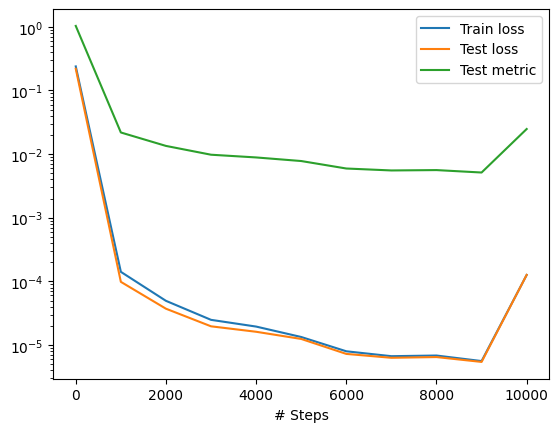

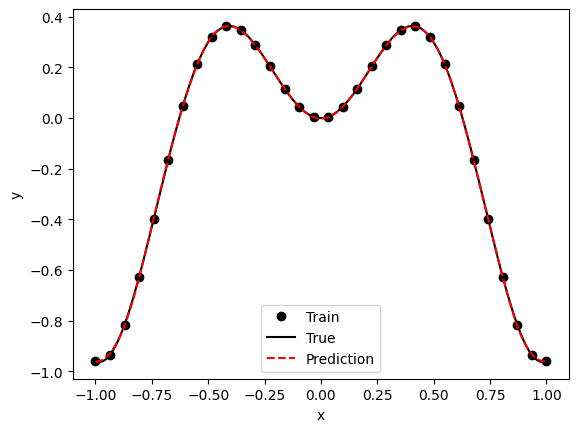


Training model for func_1...

Compiling model...
'compile' took 0.037617 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.10e-01]    [3.15e-01]    [1.02e+00]    
1000      [1.19e-03]    [8.23e-04]    [5.23e-02]    
2000      [8.79e-05]    [7.10e-05]    [1.54e-02]    
3000      [2.97e-05]    [2.92e-05]    [9.85e-03]    
4000      [2.02e-06]    [2.34e-06]    [2.79e-03]    
5000      [4.93e-06]    [5.34e-06]    [4.21e-03]    
6000      [5.28e-07]    [7.94e-07]    [1.62e-03]    
7000      [2.79e-06]    [3.04e-06]    [3.18e-03]    
8000      [7.30e-06]    [7.61e-06]    [5.03e-03]    
9000      [3.78e-06]    [4.08e-06]    [3.68e-03]    
10000     [2.22e-07]    [3.65e-07]    [1.10e-03]    

Best model at step 10000:
  train loss: 2.22e-07
  test loss: 3.65e-07
  test metric: [1.10e-03]

'train' took 5.674853 s



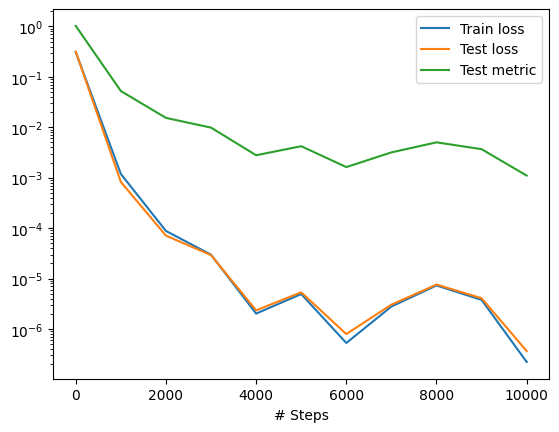

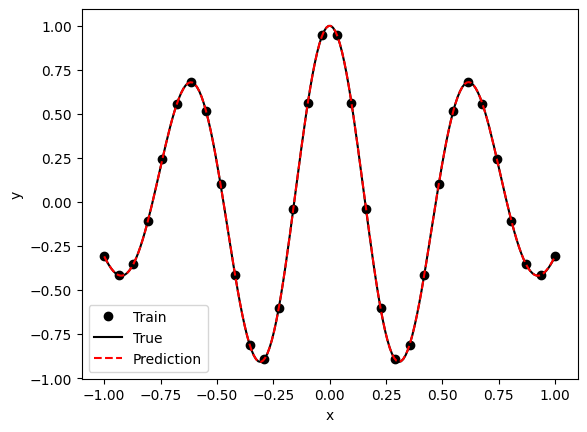


Training model for func_2...

Compiling model...
'compile' took 0.025393 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.95e-01]    [2.82e-01]    [8.16e-01]    
1000      [5.92e-04]    [4.73e-04]    [3.34e-02]    
2000      [5.31e-04]    [4.15e-04]    [3.13e-02]    
3000      [2.80e-04]    [2.01e-04]    [2.18e-02]    
4000      [1.55e-04]    [1.23e-04]    [1.70e-02]    
5000      [1.24e-04]    [1.01e-04]    [1.54e-02]    
6000      [1.09e-04]    [9.00e-05]    [1.46e-02]    
7000      [7.72e-05]    [6.27e-05]    [1.22e-02]    
8000      [8.12e-05]    [6.90e-05]    [1.28e-02]    
9000      [6.70e-05]    [5.81e-05]    [1.17e-02]    
10000     [6.16e-05]    [5.24e-05]    [1.11e-02]    

Best model at step 10000:
  train loss: 6.16e-05
  test loss: 5.24e-05
  test metric: [1.11e-02]

'train' took 5.497825 s



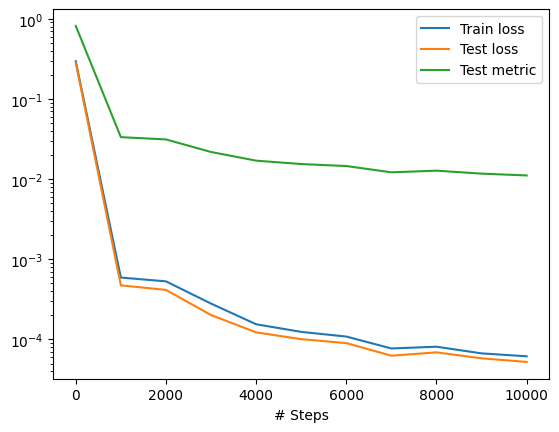

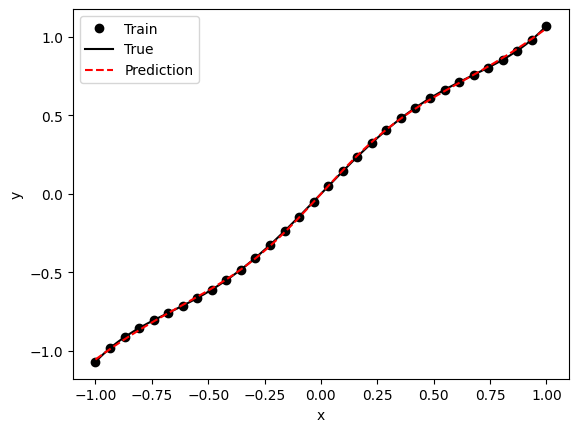


Training model for func_3...

Compiling model...
'compile' took 0.040457 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [5.49e-01]    [5.49e-01]    [9.88e-01]    
1000      [3.48e-01]    [4.28e-01]    [8.73e-01]    
2000      [1.76e-01]    [3.72e-01]    [8.13e-01]    
3000      [1.16e-01]    [3.12e-01]    [7.45e-01]    
4000      [9.79e-02]    [3.09e-01]    [7.41e-01]    
5000      [9.71e-03]    [2.39e-01]    [6.52e-01]    
6000      [1.82e-03]    [2.44e-01]    [6.59e-01]    
7000      [1.42e-03]    [2.44e-01]    [6.58e-01]    
8000      [2.96e-03]    [2.47e-01]    [6.62e-01]    
9000      [1.00e-03]    [2.45e-01]    [6.59e-01]    
10000     [8.20e-04]    [2.45e-01]    [6.60e-01]    

Best model at step 10000:
  train loss: 8.20e-04
  test loss: 2.45e-01
  test metric: [6.60e-01]

'train' took 5.900938 s



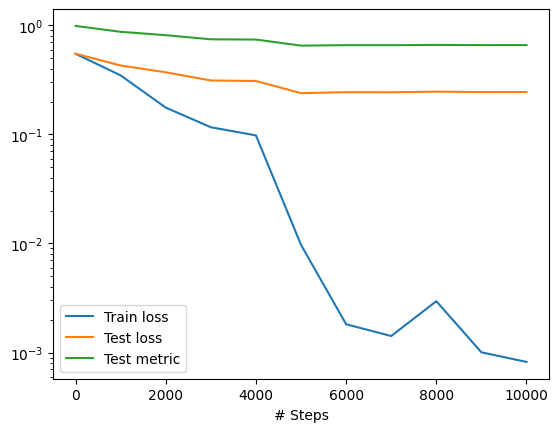

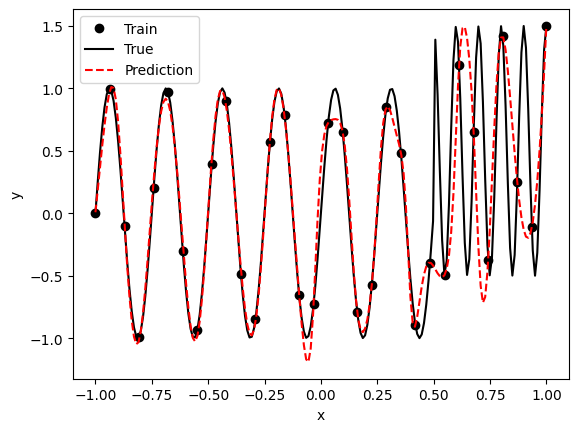


Training model for func_4...

Compiling model...
'compile' took 0.028899 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [7.52e-01]    [7.28e-01]    [1.04e+00]    
1000      [1.45e-01]    [1.23e-01]    [4.28e-01]    
2000      [1.44e-01]    [1.24e-01]    [4.28e-01]    
3000      [1.44e-01]    [1.24e-01]    [4.28e-01]    
4000      [1.36e-01]    [1.19e-01]    [4.21e-01]    
5000      [1.11e-01]    [1.08e-01]    [4.01e-01]    
6000      [5.62e-02]    [8.22e-02]    [3.49e-01]    
7000      [3.31e-02]    [7.22e-02]    [3.27e-01]    
8000      [1.85e-02]    [7.39e-02]    [3.31e-01]    
9000      [1.61e-02]    [8.15e-02]    [3.48e-01]    
10000     [8.09e-03]    [7.72e-02]    [3.39e-01]    

Best model at step 10000:
  train loss: 8.09e-03
  test loss: 7.72e-02
  test metric: [3.39e-01]

'train' took 5.086170 s



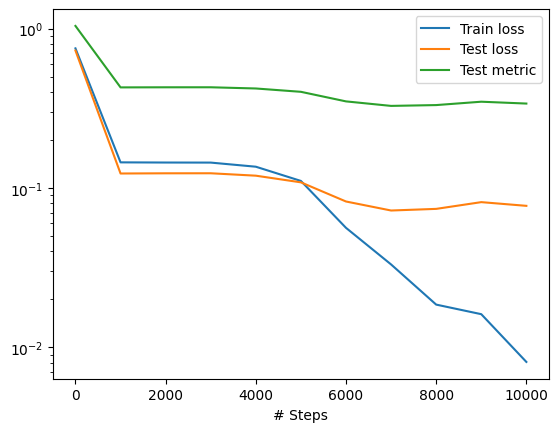

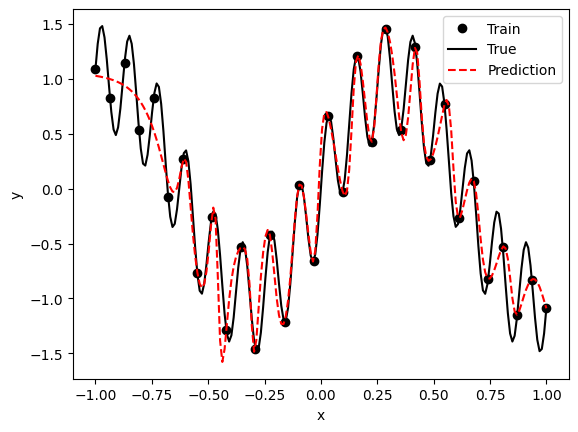


Training model for func_5...

Compiling model...
'compile' took 0.033619 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [4.98e-02]    [4.47e-02]    [1.20e+00]    
1000      [3.53e-02]    [3.09e-02]    [9.97e-01]    
2000      [5.27e-04]    [2.64e-03]    [2.91e-01]    
3000      [2.12e-05]    [3.52e-03]    [3.37e-01]    
4000      [1.46e-05]    [2.89e-03]    [3.05e-01]    
5000      [8.73e-06]    [2.35e-03]    [2.75e-01]    
6000      [4.31e-06]    [1.88e-03]    [2.46e-01]    
7000      [1.90e-06]    [1.51e-03]    [2.20e-01]    
8000      [9.82e-07]    [1.25e-03]    [2.01e-01]    
9000      [6.88e-07]    [1.08e-03]    [1.87e-01]    
10000     [4.67e-07]    [9.64e-04]    [1.76e-01]    

Best model at step 10000:
  train loss: 4.67e-07
  test loss: 9.64e-04
  test metric: [1.76e-01]

'train' took 6.319621 s



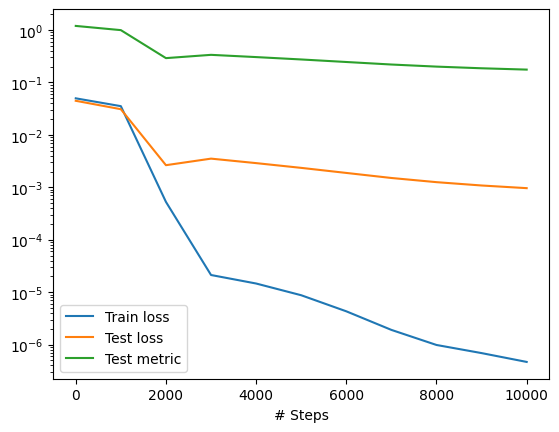

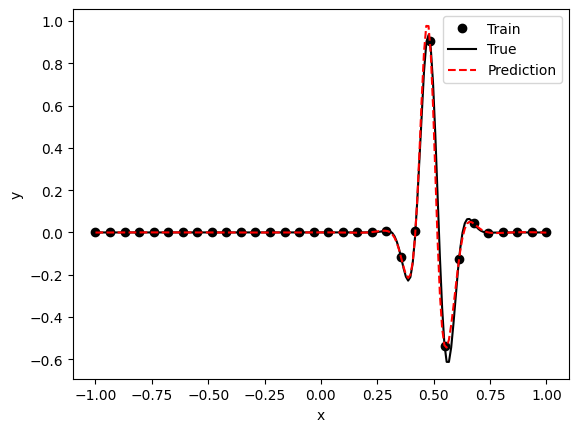


Training model for func_6...

Compiling model...
'compile' took 0.028981 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [1.24e+00]    [1.22e+00]    [1.10e+00]    
1000      [3.60e-02]    [4.59e-02]    [2.13e-01]    
2000      [1.75e-02]    [5.16e-02]    [2.26e-01]    
3000      [1.63e-02]    [5.84e-02]    [2.40e-01]    
4000      [1.56e-02]    [6.98e-02]    [2.63e-01]    
5000      [1.43e-02]    [7.28e-02]    [2.68e-01]    
6000      [1.29e-02]    [7.45e-02]    [2.71e-01]    
7000      [1.07e-02]    [6.32e-02]    [2.50e-01]    
8000      [8.19e-03]    [4.02e-02]    [1.99e-01]    
9000      [6.25e-03]    [4.08e-02]    [2.01e-01]    
10000     [4.90e-03]    [3.78e-02]    [1.93e-01]    

Best model at step 10000:
  train loss: 4.90e-03
  test loss: 3.78e-02
  test metric: [1.93e-01]

'train' took 5.159219 s



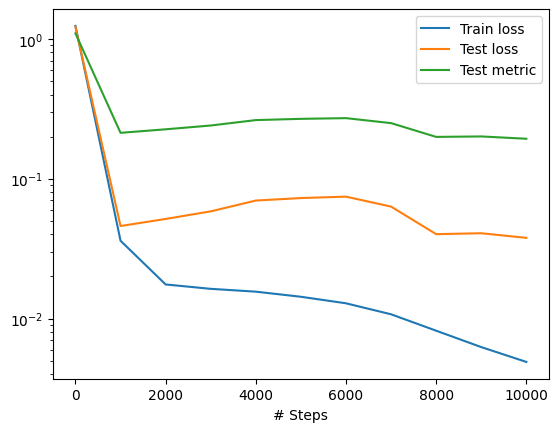

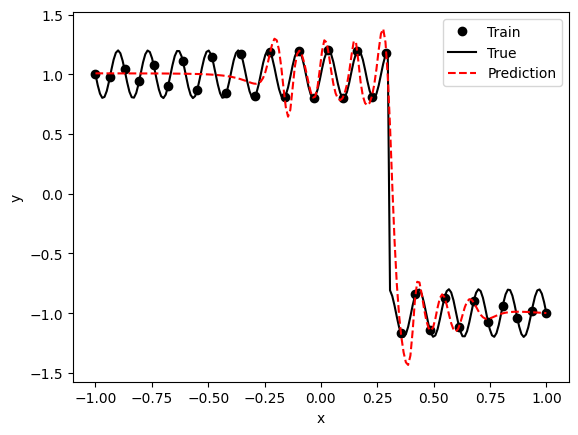


Training model for func_7...

Compiling model...
'compile' took 0.026921 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [4.67e-01]    [4.37e-01]    [1.02e+00]    
1000      [2.82e-01]    [4.14e-01]    [9.93e-01]    
2000      [1.65e-01]    [3.36e-01]    [8.94e-01]    
3000      [5.77e-02]    [3.19e-01]    [8.71e-01]    
4000      [4.09e-02]    [4.01e-01]    [9.77e-01]    
5000      [2.47e-02]    [3.87e-01]    [9.61e-01]    
6000      [2.38e-02]    [3.74e-01]    [9.44e-01]    
7000      [1.83e-02]    [3.81e-01]    [9.53e-01]    
8000      [1.81e-02]    [3.81e-01]    [9.52e-01]    
9000      [1.66e-02]    [3.87e-01]    [9.59e-01]    
10000     [1.58e-02]    [3.91e-01]    [9.65e-01]    

Best model at step 10000:
  train loss: 1.58e-02
  test loss: 3.91e-01
  test metric: [9.65e-01]

'train' took 6.409664 s



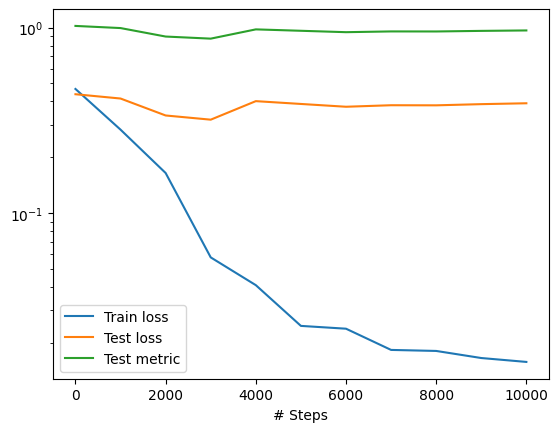

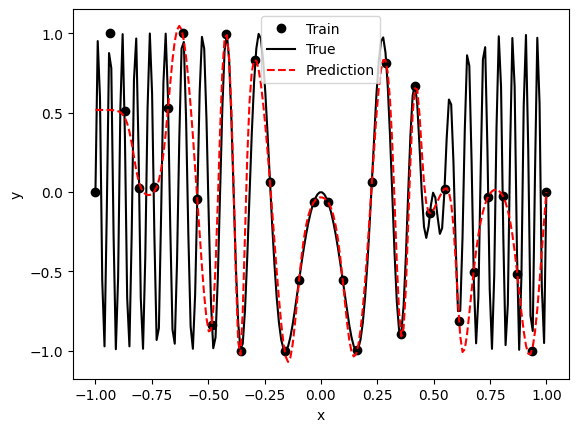

In [ ]:
activation = "tanh"
initializer = "Glorot uniform"

for i, f in enumerate(functions):
    print(f"\nTraining model for func_{i}...\n")

    data = dde.data.Function(geom, f, num_train, num_test)
    net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

    model = dde.Model(data, net)
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])
    losshistory, train_state = model.train(iterations=10000)

    dde.saveplot(losshistory, train_state, issave=False, isplot=True)

In [ ]:
geom = dde.geometry.Interval(-1, 1) # Definition of the computational domain (Geometry specification)
num_train = 32*8 # Sampled points inside "geom" domain. These points are used to learn
num_test = 200 # These points also inside "geom" but not shown during the training, used to evaluate the model's performance

# Function 7


Training model for func_0...

Compiling model...
'compile' took 0.036301 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [4.38e-01]    [4.37e-01]    [1.02e+00]    
1000      [3.41e-01]    [3.41e-01]    [9.01e-01]    
2000      [2.37e-01]    [2.37e-01]    [7.51e-01]    
3000      [2.06e-01]    [2.05e-01]    [6.99e-01]    
4000      [1.92e-01]    [1.92e-01]    [6.76e-01]    
5000      [1.83e-01]    [1.83e-01]    [6.60e-01]    
6000      [1.65e-01]    [1.65e-01]    [6.27e-01]    
7000      [1.62e-01]    [1.62e-01]    [6.22e-01]    
8000      [1.58e-01]    [1.58e-01]    [6.14e-01]    
9000      [1.57e-01]    [1.57e-01]    [6.11e-01]    
10000     [1.56e-01]    [1.56e-01]    [6.10e-01]    

Best model at step 10000:
  train loss: 1.56e-01
  test loss: 1.56e-01
  test metric: [6.10e-01]

'train' took 7.441632 s



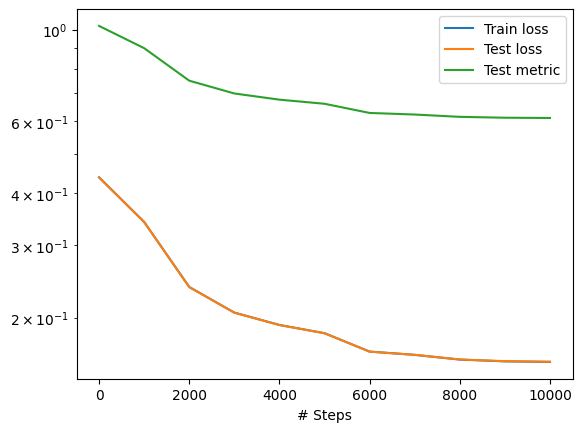

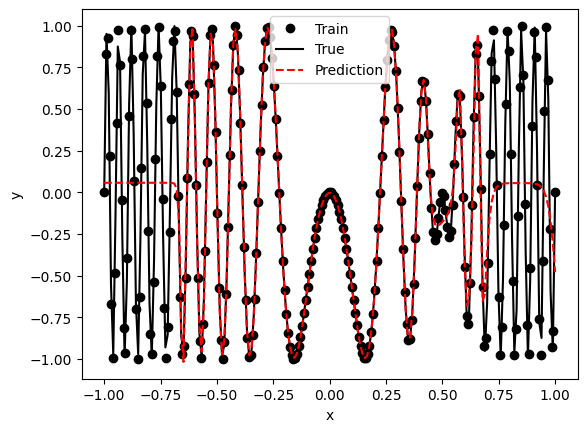

In [ ]:
activation = "tanh"
initializer = "Glorot uniform"

functions = [func_7]

for i, f in enumerate(functions):
    print(f"\nTraining model for func_{i}...\n")

    data = dde.data.Function(geom, f, num_train, num_test)
    net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

    model = dde.Model(data, net)
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])
    losshistory, train_state = model.train(iterations=10000)

    dde.saveplot(losshistory, train_state, issave=False, isplot=True)

What is happening? this function is very hard to approximate.

This function has:

- Nonlinear steep transition from the tanh(10(x - 0.5)) part — it’s almost a step at x=0.5
- Rapidly changing frequency due to sin(20πx²) — this is a non-stationary frequency (i.e., higher frequency toward x=1).

These two things combined make this a nightmare for standard feedforward networks.

Option 1: Increase depth and width of network


Training model for func_0...

Compiling model...
'compile' took 1.178767 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [4.32e-01]    [4.32e-01]    [1.01e+00]    
1000      [2.85e-01]    [2.85e-01]    [8.24e-01]    
2000      [1.99e-01]    [1.99e-01]    [6.88e-01]    
3000      [1.70e-01]    [1.70e-01]    [6.36e-01]    
4000      [1.48e-01]    [1.48e-01]    [5.94e-01]    
5000      [1.17e-01]    [1.17e-01]    [5.28e-01]    
6000      [5.60e-02]    [5.62e-02]    [3.66e-01]    
7000      [3.25e-02]    [3.33e-02]    [2.82e-01]    
8000      [1.85e-02]    [1.86e-02]    [2.10e-01]    
9000      [3.40e-03]    [3.46e-03]    [9.07e-02]    
10000     [1.25e-02]    [1.29e-02]    [1.75e-01]    

Best model at step 9000:
  train loss: 3.40e-03
  test loss: 3.46e-03
  test metric: [9.07e-02]

'train' took 183.790838 s



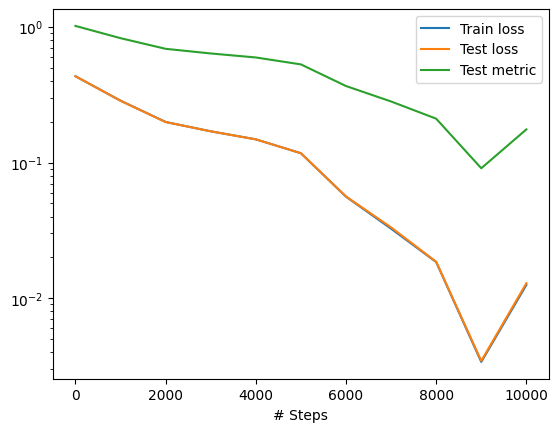

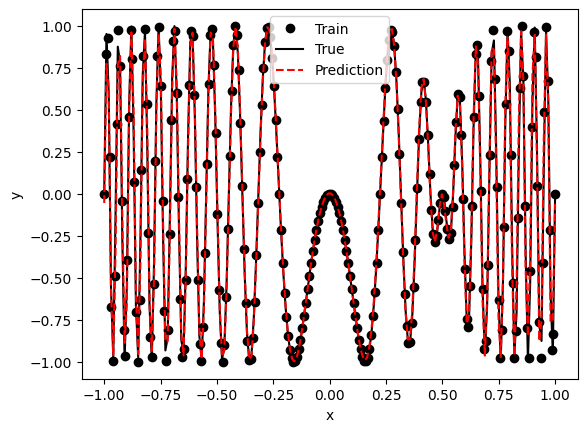

In [ ]:
activation = "tanh"
initializer = "Glorot uniform"

functions = [func_7]

for i, f in enumerate(functions):
    print(f"\nTraining model for func_{i}...\n")

    data = dde.data.Function(geom, f, num_train, num_test)
    net = dde.nn.FNN([1] + [250] * 7 + [1], activation, initializer)

    model = dde.Model(data, net)
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])
    losshistory, train_state = model.train(iterations=10000)

    dde.saveplot(losshistory, train_state, issave=False, isplot=True)